# MSP - 2. projekt 

Lucie Svobodová (xsvobo1x@stud.fit.vutbr.cz)  
Statistika a pravděpodobnost (MSP)  
FIT VUT, 2023/2024  


In [8]:
# Import použitých knihoven
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from scipy.stats import gamma, poisson, truncnorm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from matplotlib import cm

## Bayesovské odhady - úloha 1

### a) Konjugované apriorní a aposteriorní rozdělení, prediktivní rozdělení

Předpokládáme, že počet připojení na internetovou síť za 1 ms je popsaný náhodnou veličinou s Poissonovým rozdělením s parametrem 𝜆, t.j. 𝑋~𝑃𝑜(𝜆).

O parametru 𝜆 máme následující expertní odhad: každých 5 ms by mělo nastat 10 připojení. 

Pozorovali jsme připojení po dobu 100 ms. Pozorovaní o počtu připojení za každou 1 ms jsou uvedené v souboru measurements.csv ve sloupci „úloha_1 a)“.

Vašim zadáním je z této expertní informace urči konjugované apriorní rozdělení k parametru Poissonova rozdělení a na základě pozorovaní určit aposteriorní rozdělení. Dále určete apriorní a aposteriorní prediktivní rozdělení pozorovaní. 

In [15]:
# Načtení dat
data = pd.read_csv("measurements.csv")
observed_data = data["uloha_1 a)"].values
observed_data = observed_data[~np.isnan(observed_data)]

# Expertní odhad parametru λ
lambda_expert = 10 / 5  # 10 připojení za 5 ms

1) Do jednoho obrázku vykreslete apriorní a aposteriorní hustotou parametru Poissonova rozdělení 𝜆.

Konjugované apriorní rozdělení: Gamma  
Apriorní parametry: α, β  
α total occurrences in β intervals  
α = 10  
β = 5 

Z tabulky konjugovaných rozdělení určíme apriorní i aposteriorní rozdělení: gamma rozdělení.

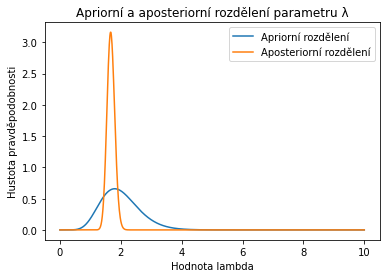

In [56]:
# Expertní odhad
a_prior = 10
b_prior = 5

# Posteriorní rozdělení
a_posterior = a_prior + sum(observed_data)
b_posterior = b_prior + len(observed_data)
lambda_posterior_mean = a_posterior / b_posterior

# Vykreslení apriorního a aposteriorního rozdělení parametru λ
x = np.linspace(0, 10, 1000)
prior = gamma.pdf(x, a_prior, scale=1/b_prior)
posterior = gamma.pdf(x, a_posterior, scale=1/b_posterior)
plt.plot(x, prior, label="Apriorní rozdělení")
plt.plot(x, posterior, label="Aposteriorní rozdělení")
plt.legend()
plt.xlabel("Hodnota lambda")
plt.ylabel("Hustota pravděpodobnosti")
plt.title("Apriorní a aposteriorní rozdělení parametru λ")
plt.show()

2) Do jednoho obrázku vykreslíte apriorní a aposteriorní prediktivní hustotou pozorovaní 𝑥 za jeden časový interval.

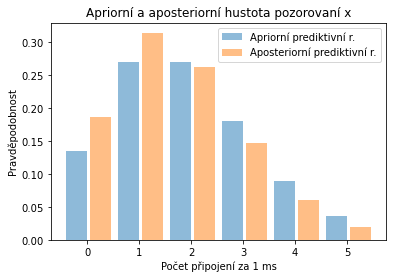

In [57]:
x_pred = np.arange(0, max(observed_data) + 1)
prior_pred = poisson.pmf(x_pred, lambda_expert)
posterior_pred = poisson.pmf(x_pred, lambda_posterior_mean)

width=0.4
plt.bar(x_pred-0.2, prior_pred, width, label="Apriorní prediktivní r.", alpha=0.5)
plt.bar(x_pred+0.25, posterior_pred, width, label="Aposteriorní prediktivní r.", alpha=0.5)
plt.legend()
plt.xlabel("Počet připojení za 1 ms")
plt.ylabel("Pravděpodobnost")
plt.title("Apriorní a aposteriorní hustota pozorovaní x")
plt.show()

3) Sestrojte 95% interval spolehlivosti pro parametr 𝜆 z apriorního a aposteriorního rozdělení a porovnejte je.

In [64]:
# 95% interval spolehlivosti
prior_interval = gamma.interval(0.95, a_prior, scale=1/b_prior)
posterior_interval = gamma.interval(0.95, a_posterior, scale=1/b_posterior)
print("95% Apriorní interval:", prior_interval)
print("95% Aposteriorní interval:", posterior_interval)
print("")

# Výpočet šířek intervalů
aprior_width = prior_interval[1] - prior_interval[0]
print("Šířka apriorního intervalu:", aprior_width)
aposterior_width = posterior_interval[1] - posterior_interval[0]
print("Šířka aposteriorního intervalu:", aposterior_width)

95% Apriorní interval: (0.9590777392264868, 3.416960690283833)
95% Aposteriorní interval: (1.4376938284869922, 1.9327207471868797)

Šířka apriorního intervalu: 2.4578829510573463
Šířka aposteriorního intervalu: 0.49502691869988746


Odhad parametru $\lambda$ se zpřesňuje s přibývajícím množstvím dat (měření). 95% interval pro aposteriorní pravděpodobnost je z tohoto důvodu mnohem užší než pro apriorní pravděpodobnost.

4) Vyberte si dva aposteriorní bodové odhady parametru 𝜆, porovnejte je a okomentujte jejich výběr.

In [81]:
# 4Porovnání dvou aposteriorních odhadů
posterior_median = (a_posterior - 1) / b_posterior
posterior_mean = a_posterior / b_posterior

print("Aposteriorní median parametru 𝜆: {:.2f}".format(posterior_median))
print("Aposteriorní střední hodnota parametru 𝜆: {:.2f}".format(posterior_mean))

Aposteriorní median parametru 𝜆: 1.67
Aposteriorní střední hodnota parametru 𝜆: 1.68


Za dva aposteriorní bodové odhady parametru $\lambda$ byla zvolena střední hodnota a medián. Jak je vidět na konkrétních hodnotách, medián se od střední hodnoty liší minimálně, což může znamenat, že daná distribuce je relativně symetrická a není moc ovlivněna extrémními hodnotami. To lze ostatně pozorovat i na grafu v úkolu 1.3.

5) Vyberte si jeden apriorní a jeden aposteriorní bodový odhad počtu pozorovaní a
porovnejte je. 

In [79]:
print("Apriorní median parametru 𝜆: {:.2f}".format(lambda_expert))
print("Aposteriorní median parametru 𝜆: {:.2f}".format(posterior_median))

Apriorní median parametru 𝜆: 2.00
Aposteriorní median parametru 𝜆: 1.67


Při porovnání apriorního a aposteriorního mediánu je vidět, že se opět hodnota parametru $\lambda$ zpřesňovala a snížila. Měli bychom být pomocí aposteriorního odhadu s větší pravděpoeodobností schopni říct, že data byla vygenerována z tohoto aposteriorního rozdelení.

### b) Aproximace diskrétním rozdělením

Integrál ve jmenovateli Bayesově větě je ve většině praktických aplikací důvodem, proč nejsme schopní odvodit aposteriorní hustotu analyticky. Jeden ze způsobů, jak překonat tento problém a odhadnout parametr (ne vektor parametrů) je, že zvolíme diskrétní aproximaci a neřešitelný integrál přejde na sumu.

Poznámka:
Nyní řešíme odhad aposteriorní hustoty a parametrů v případě, že apriorní informace (hustota) je ve formě naměřených hodnot (sloupec „uloha_1 b)_prior“) a rozdělení procesu, který sledujete, je také ve tvaru naměřených hodnot (sloupec „uloha_1 b)_pozorovania“). Tedy místo zadání dvou hustot máme naměřené hodnoty a s pomocí tříděného statistického souboru odhadneme hustoty. Pak se plocha pod hustotou spočítá součtem četností (obdoba numerického počítání integrálu obdélníkovou metodou).

Víme, že délka zpracování procesu v milisekundách ms má odseknuté normální rozdělení (truncated normal distribution) s parametry
𝜇 = 3, 𝜎
2 = 1, 𝑎 = 1

Naší úlohou je odhadnout parametr 𝑏, t.j. maximální dobu trvání procesu. Máme historické záznamy o jeho délce trvání (sloupec „uloha 1 a)_prior“) na počítačích podobné výkonové řady. Provedli jsme sérii pozorovaní po 10, číslo série pozorovaní v tabulce v sloupci „skupina“. Z těchto záznamů vyjádříte apriorní informaci o parametru 𝑏.

Ve sloupci „uloha_1 b)_pozorovania“ jsou naše pozorování délky trvání procesu Vyjádřete funkci věrohodnosti (sloupec „uloha_1 b)_pozorovania“) (v tomto případe také jen její diskrétní aproximace) a následně diskrétní aposteriorní hustotu.

1) Do jednoho grafu vykreslíte apriorní, aposteriorní hustotou a funkci věrohodnosti.
Funkci věrohodnosti normujte tak, aby jej součet byl 1 kvůli porovnatelnosti
v obrázku.

In [82]:
# Načtení dat
data = pd.read_csv("measurements.csv")
data_1b_prior = data[['uloha_1 b)_prior', 'skupina']].dropna()
data_1b_pozorovani = data['uloha_1 b)_pozorování'].dropna().astype(float)

Vypočteme apriorní hustotu parametru b.

In [104]:
# Apriorní hustota parametru b
bins = 40
# Max v každé skupině
max_values_idx = data_1b_prior.groupby('skupina')['uloha_1 b)_prior'].idxmax()
new_df = data_1b_prior.loc[max_values_idx]

# Tvorba diskrétního rozdělení
counts = pd.cut(new_df['uloha_1 b)_prior'], bins).value_counts().sort_index()
means = new_df.groupby(pd.cut(new_df['uloha_1 b)_prior'], bins), observed=False).mean()
mean_occur = pd.DataFrame({'mean': means['uloha_1 b)_prior'], 'occur': counts})
mean_occur.reset_index(inplace=True)
total_occurrences = mean_occur['occur'].sum()
mean_occur['prob'] = mean_occur['occur'] / total_occurrences

Následně vypočteme věrohodnostní funkci.

In [112]:
# Věrohodnostní funkce
mu = 3
sigma = 1
a = 1
probs = []
for i, b in enumerate(mean_occur['mean']):
    a_scaled = (a- mu) / sigma
    b_scaled = (b - mu) / sigma
    tr = truncnorm(a_scaled, b_scaled, loc=mu, scale=sigma)
    prob = np.prod([tr.pdf(d) for d in data_1b_pozorovani])
    probs.append(prob)

# Normalizace
likelihood = np.array(probs) / np.sum(probs)


Jako poslední vypočteme aposteriorní rozdělení a vykreslíme finální graf.

In [113]:
# aposter_1: (d_j | b_i) * h(b_i)
aposter_1 = np.array([prob * prior_prob for prob, prior_prob in zip(probs, mean_occur['prob'])])

# poster: Σ_i(Π_j(d_j | b_i) * h(b_i) / Σ_i(Π_j(d_j | b_i) * h(b_i))
poster = aposter_1 / np.sum(aposter_1)


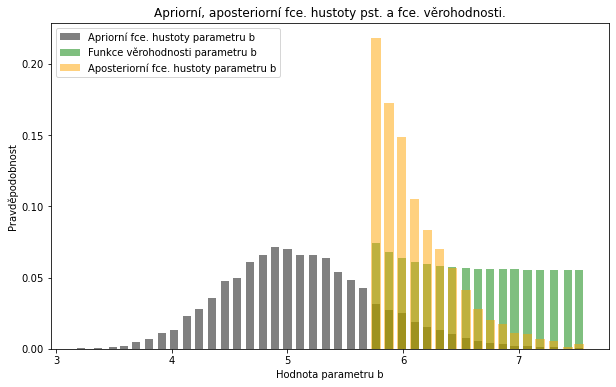

In [121]:
# Graf
plt.figure(figsize=(10, 6))
plt.bar(mean_occur['mean'], mean_occur['prob'], label='Apriorní fce. hustoty parametru b', color='gray', width=0.07)
plt.bar(mean_occur['mean'], likelihood, width=0.07, label='Funkce věrohodnosti parametru b', color='green', alpha=0.5)
plt.bar(mean_occur['mean'], poster, width=0.08, label='Aposteriorní fce. hustoty parametru b', color='orange', alpha=0.5)
plt.xlabel('Hodnota parametru b')
plt.ylabel('Pravděpodobnost')
plt.title('Apriorní, aposteriorní fce. hustoty pst. a fce. věrohodnosti.')
plt.legend(loc='upper left')
plt.show()


2) Z aposteriorní hustoty určete 95% interval spolehlivosti (konfidenční interval) pro
parametr 𝑏.

In [125]:
# Náhodné vzorkování
vzorek_b1 = np.random.choice(mean_occur_1b['mean'].tolist(), size=10000, p=posterior_b1)

# 95% interval spolehlivosti
lower_bound, upper_bound = np.percentile(vzorek_b1, [2.5, 97.5])
print(f"95% Interval spolehlivosti (konfidenční interval): ({lower_bound:.2f}, {upper_bound:.2f})")


95% Interval spolehlivosti (konfidenční interval): (5.77, 7.08)


3) Vyberte dva bodové odhady parametru 𝑏 a spočítejte je.

In [13]:
# Výběr a výpočet průměru a mediánu
prumer_b1 = np.mean(vzorek_b1)
median_b1 = np.median(vzorek_b1)

print("Bodové odhady z posteriorní funkce hustoty pravděpodobnosti parametru b")
print(f"Průměr: {prumer_b1:.4f}")
print(f"Medián: {median_b1:.4f}")


Bodové odhady z posteriorní funkce hustoty pravděpodobnosti parametru b
Průměr: 6.1174
Medián: 5.9883


Za bodové odhady parametru $b$ byly opět zvoleny průměr a medián, které, stejně jako v předchozí úloze, naznačují, že aposteriorní rozdělení dat je poměrně symetrické, protože mezi mediánem a střední hodnotou není výrazný rozdíl, a taky že data nejsou velmi ovlivněna extrémními hodnotami.

## Regrese - úloha 2

Disclaimer: data (včetně „příběhu“) jsou vygenerovaná a nemusí mít dobrý obraz v realitě. Berte proto prosím výsledky z regrese s „rezervou“. Díky.

Podařilo se Vám pomocí stroje času vrátit do doby „zlatého věku“ sociálních sítí a rozhodli jste se konkurovat Facebooku a Twitteru. V souboru Data_v1.0.csv máte k dispozici záznamy od více než 500 uživatelů o rychlosti odezvy (sloupec ping [ms]) během používání Vaší aplikace. Ke každému zápisu máte navíc k dispozici o počtu uživatelů (sloupec ActiveUsers) v daném okamžiku, o procentu uživatelů, kteří momentálně interagují s prezentovaným obsahem (sloupec InteractingPct), o procentu uživatelů, kteří jen tupě scrollují po Vaší obdobě timeline/twitterfeedu (sloupec ScrollingPct) a o operačním systému zařízení ze kterého se uživatel připojil (OSType).

1) Pomocí zpětné eliminace určete vhodný regresní model. Za výchozí „plný“ model
považujte plný kvadratický model (všechny interakce druhého řádu a všechny druhé
mocniny, které dávají smysl).
- Zapište rovnici Vašeho finálního modelu.
- Diskutujte splnění předpokladů lineární regrese a základní regresní
diagnostiky.
- Pokud (až během regresního modelování) identifikujete některé „extrémně
odlehlé hodnoty“ můžete ty „nejodlehlejší“ hodnoty, po alespoň krátkém
zdůvodnění, vyřadit.

Modelovaná data:

In [233]:
# load data to df dataframe
df = pd.read_csv('Data_v1.0.csv')

# print dataframe
print(df)

      OSType  ActiveUsers  InteractingPct  ScrollingPct  Ping [ms]
0        iOS         4113          0.8283        0.1717         47
1        iOS         7549          0.3461        0.6539         46
2    Windows         8855          0.2178        0.7822         55
3    Android         8870          0.0794        0.9206         56
4      MacOS         9559          0.7282        0.2718         76
..       ...          ...             ...           ...        ...
497      iOS         5315          0.1974        0.8026         28
498    MacOS         1392          0.2373        0.7627         24
499      iOS         6014          0.8112        0.1888         54
500  Android         5118          0.2345        0.7655         39
501    MacOS         2660          0.9390        0.0610         55

[502 rows x 5 columns]


V datech se vyskytuje kategorická proměnná, OSType. Pomocí one-hot encoding z ní vytvoříme numerické proměnné. 

In [234]:
# perform one-hot encoding for the column OSType
df = pd.get_dummies(df, columns=['OSType'], prefix='OSType', drop_first=True)

# convert bool to int
for column in df.columns:
    if df[column].dtype == bool:
        df[column] = df[column].astype(float)

# print the converted dataframe
print(df)

     ActiveUsers  InteractingPct  ScrollingPct  Ping [ms]  OSType_MacOS  \
0           4113          0.8283        0.1717         47           0.0   
1           7549          0.3461        0.6539         46           0.0   
2           8855          0.2178        0.7822         55           0.0   
3           8870          0.0794        0.9206         56           0.0   
4           9559          0.7282        0.2718         76           1.0   
..           ...             ...           ...        ...           ...   
497         5315          0.1974        0.8026         28           0.0   
498         1392          0.2373        0.7627         24           1.0   
499         6014          0.8112        0.1888         54           0.0   
500         5118          0.2345        0.7655         39           0.0   
501         2660          0.9390        0.0610         55           1.0   

     OSType_Windows  OSType_iOS  
0               0.0         1.0  
1               0.0         1.0

Nyní zajistíme, že se mezi modelovanými daty nevyskytuje lineární závislost. To zjistíme pomocí matice korelace.

In [235]:
# calculate the correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

                ActiveUsers  InteractingPct  ScrollingPct  Ping [ms]  \
ActiveUsers        1.000000        0.040275     -0.040275   0.693499   
InteractingPct     0.040275        1.000000     -1.000000   0.406957   
ScrollingPct      -0.040275       -1.000000      1.000000  -0.406957   
Ping [ms]          0.693499        0.406957     -0.406957   1.000000   
OSType_MacOS      -0.000136        0.086466     -0.086466   0.333107   
OSType_Windows     0.003135       -0.016964      0.016964   0.047783   
OSType_iOS        -0.063206       -0.062634      0.062634  -0.360491   

                OSType_MacOS  OSType_Windows  OSType_iOS  
ActiveUsers        -0.000136        0.003135   -0.063206  
InteractingPct      0.086466       -0.016964   -0.062634  
ScrollingPct       -0.086466        0.016964    0.062634  
Ping [ms]           0.333107        0.047783   -0.360491  
OSType_MacOS        1.000000       -0.371550   -0.341322  
OSType_Windows     -0.371550        1.000000   -0.334506  
OSType_iOS

Z korelační matice je vidět, že v datech je lineární závislost mezi proměnnými InteractingPct a ScrollingPct. Odstraníme tedy jednu z těchto proměnných, například proměnnou ScrollingPct. Mezi jinými proměnnými není tak vysoká závislost a proto všechny zbývající proměnné ponecháme.

In [236]:
# drop ScrollingPct column
df.drop(['ScrollingPct'], axis=1, inplace=True)
print(df)

     ActiveUsers  InteractingPct  Ping [ms]  OSType_MacOS  OSType_Windows  \
0           4113          0.8283         47           0.0             0.0   
1           7549          0.3461         46           0.0             0.0   
2           8855          0.2178         55           0.0             1.0   
3           8870          0.0794         56           0.0             0.0   
4           9559          0.7282         76           1.0             0.0   
..           ...             ...        ...           ...             ...   
497         5315          0.1974         28           0.0             0.0   
498         1392          0.2373         24           1.0             0.0   
499         6014          0.8112         54           0.0             0.0   
500         5118          0.2345         39           0.0             0.0   
501         2660          0.9390         55           1.0             0.0   

     OSType_iOS  
0           1.0  
1           1.0  
2           0.0  
3  

TODO nějaké jiné předpoklady před děláním regresního modelu???

Nyní můžeme vytvořit plný kvadratický model. Ten tedy obsahuje všechny interakce druhého řádu, kromě interakcí původních kategorických atributů mezi sebou, a všechny mocniny druhého řádu, kromě druhých mocnin původních kategorických atributů - ty nemají smysl. 

Výchozí kvadratický model:  
$Ping = \alpha*ActiveUsers + \beta*InteractingPct + \gamma*OSType\_MacOS + \delta*OSType\_Windows + \zeta*OSType\_iOS + \eta*ActiveUsers*InteractingPct + \theta*ActiveUsers*OSType\_MacOS + \iota*ActiveUsers*OSType\_Windows + \kappa*ActiveUsers*OSType\_iOS + \lambda*InteractingPct*OSType\_MacOS + \mu*InteractingPct*OSType\_Windows + \nu*InteractingPct*OSType\_iOS + \xi*ActiveUsers^2 + \omicron*InteractingPct^2 + \epsilon$
kde $\alpha, \beta, \gamma, \delta, \zeta, \eta, \theta, \iota, \kappa, \lambda, \mu, \nu, \xi, \omicron$ jsou koeficienty jednotlivých proměnných.

Pro tento model vypočteme jednotlivé charakteristiky:

In [237]:
# full quadratic model
formula_x_y = 'ActiveUsers + InteractingPct + OSType_MacOS + OSType_Windows + OSType_iOS'
formula_xy = 'ActiveUsers:InteractingPct + ActiveUsers:OSType_MacOS + ActiveUsers:OSType_Windows + ActiveUsers:OSType_iOS + InteractingPct:OSType_MacOS + InteractingPct:OSType_Windows + InteractingPct:OSType_iOS'
formula_x2_y2 = 'I(ActiveUsers**2) + I(InteractingPct**2)'
formula = 'Q("Ping [ms]") ~ ' + formula_x_y + ' + ' + formula_xy + ' + ' + formula_x2_y2

model = smf.ols(formula=formula, data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Q("Ping [ms]")   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     187.9
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          5.18e-186
Time:                        23:01:28   Log-Likelihood:                -1598.4
No. Observations:                 502   AIC:                             3227.
Df Residuals:                     487   BIC:                             3290.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [213]:
# VIF

X = pd.DataFrame(model.exog, columns=model.exog_names)
vif = pd.Series([variance_inflation_factor(X.values, i) 
                 for i in range(X.shape[1])], 
                 index=X.columns)
vif_df = vif.to_frame()
# Nastavení názvu sloupce
vif_df.columns = ['VIF']
print('\n\n\n')
print(vif_df)
#ukaž korelaci prediktorů
print('\n\n\n')
print(X.corr()) 





                                     VIF
Intercept                      79.942736
ActiveUsers                    30.743065
InteractingPct                 26.045145
OSType_MacOS                   14.719223
OSType_Windows                 13.650036
OSType_iOS                     13.158145
ActiveUsers:InteractingPct      8.909995
ActiveUsers:OSType_MacOS       10.587784
ActiveUsers:OSType_Windows     10.141273
ActiveUsers:OSType_iOS          9.056629
InteractingPct:OSType_MacOS     7.601173
InteractingPct:OSType_Windows   6.826957
InteractingPct:OSType_iOS       6.024968
I(ActiveUsers ** 2)            23.035952
I(InteractingPct ** 2)         16.065682




                               Intercept  ActiveUsers  InteractingPct  \
Intercept                            NaN          NaN             NaN   
ActiveUsers                          NaN     1.000000        0.036544   
InteractingPct                       NaN     0.036544        1.000000   
OSType_MacOS                         NaN    

In [214]:
print(df.corr())

                ActiveUsers  InteractingPct  Ping [ms]  OSType_MacOS  \
ActiveUsers        1.000000        0.036544   0.704877      0.006710   
InteractingPct     0.036544        1.000000   0.411752      0.089866   
Ping [ms]          0.704877        0.411752   1.000000      0.337669   
OSType_MacOS       0.006710        0.089866   0.337669      1.000000   
OSType_Windows     0.000596       -0.018190   0.040240     -0.369828   
OSType_iOS        -0.065845       -0.063760  -0.359717     -0.341441   

                OSType_Windows  OSType_iOS  
ActiveUsers           0.000596   -0.065845  
InteractingPct       -0.018190   -0.063760  
Ping [ms]             0.040240   -0.359717  
OSType_MacOS         -0.369828   -0.341441  
OSType_Windows        1.000000   -0.334582  
OSType_iOS           -0.334582    1.000000  


In [ ]:
# remove ActiveUsers because it has highest VIF and also quite high correlation with Ping

In [221]:
# df_new = df.drop(['ActiveUsers'], axis=1)

# print(df_new)

# reevaluate the model
# full quadratic model
formula_x_y = 'InteractingPct + OSType_MacOS + OSType_Windows + OSType_iOS'
formula_xy = 'ActiveUsers:InteractingPct + ActiveUsers:OSType_MacOS + ActiveUsers:OSType_Windows + ActiveUsers:OSType_iOS + InteractingPct:OSType_MacOS + InteractingPct:OSType_Windows + InteractingPct:OSType_iOS'
formula_x2_y2 = 'I(ActiveUsers**2) + I(InteractingPct**2)'
formula = 'Q("Ping [ms]") ~ ' + formula_x_y + ' + ' + formula_xy + ' + ' + formula_x2_y2

model = smf.ols(formula=formula, data=df)
results = model.fit()
print(results.summary())

# VIF
X = pd.DataFrame(model.exog, columns=model.exog_names)
vif = pd.Series([variance_inflation_factor(X.values, i) 
                 for i in range(X.shape[1])], 
                 index=X.columns)
vif_df = vif.to_frame()
# Nastavení názvu sloupce
vif_df.columns = ['VIF']
print('\n\n\n')
print(vif_df)
#ukaž korelaci prediktorů
print('\n\n\n')
print(X.corr()) 

                            OLS Regression Results                            
Dep. Variable:         Q("Ping [ms]")   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     122.6
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          4.16e-144
Time:                        21:54:50   Log-Likelihood:                -1689.9
No. Observations:                 500   AIC:                             3408.
Df Residuals:                     486   BIC:                             3467.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [224]:
# odstranime InteractingPct a vsechny OSType protoze maji velky VIF (odstranovano postupne, ale tady uz final v tomto kodu pro zrychleni)

# print(df_new)

# reevaluate the model
# full quadratic model
formula_x_y = ''
formula_xy = 'ActiveUsers:InteractingPct + ActiveUsers:OSType_MacOS + ActiveUsers:OSType_Windows + ActiveUsers:OSType_iOS + InteractingPct:OSType_MacOS + InteractingPct:OSType_Windows + InteractingPct:OSType_iOS'
formula_x2_y2 = 'I(ActiveUsers**2) + I(InteractingPct**2)'
formula = 'Q("Ping [ms]") ~ ' + formula_x_y + ' + ' + formula_xy + ' + ' + formula_x2_y2

model = smf.ols(formula=formula, data=df)
results = model.fit()
print(results.summary())

# VIF
X = pd.DataFrame(model.exog, columns=model.exog_names)
vif = pd.Series([variance_inflation_factor(X.values, i) 
                 for i in range(X.shape[1])], 
                 index=X.columns)
vif_df = vif.to_frame()
# Nastavení názvu sloupce
vif_df.columns = ['VIF']
print('\n\n\n')
print(vif_df)
#ukaž korelaci prediktorů
print('\n\n\n')
print(X.corr()) 


                            OLS Regression Results                            
Dep. Variable:         Q("Ping [ms]")   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     146.6
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          6.98e-133
Time:                        21:58:03   Log-Likelihood:                -1726.8
No. Observations:                 500   AIC:                             3474.
Df Residuals:                     490   BIC:                             3516.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [226]:
# Ted pokracuji s tim, co mam - modely delat pro to
# po kouknuti na P hodnoty zustava nejvetsi p-value u ActiveUsers*InteractingPct - odstranime z modelu
formula_x_y = ''
formula_xy = 'ActiveUsers:OSType_MacOS + ActiveUsers:OSType_Windows + ActiveUsers:OSType_iOS + InteractingPct:OSType_MacOS + InteractingPct:OSType_Windows + InteractingPct:OSType_iOS'
formula_x2_y2 = 'I(ActiveUsers**2) + I(InteractingPct**2)'
formula = 'Q("Ping [ms]") ~ ' + formula_x_y + ' + ' + formula_xy + ' + ' + formula_x2_y2

model = smf.ols(formula=formula, data=df)
results = model.fit()
print(results.summary())

# VIF
X = pd.DataFrame(model.exog, columns=model.exog_names)
vif = pd.Series([variance_inflation_factor(X.values, i) 
                 for i in range(X.shape[1])], 
                 index=X.columns)
vif_df = vif.to_frame()
# Nastavení názvu sloupce
vif_df.columns = ['VIF']
print('\n\n\n')
print(vif_df)

                            OLS Regression Results                            
Dep. Variable:         Q("Ping [ms]")   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     165.1
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          5.98e-134
Time:                        22:00:24   Log-Likelihood:                -1726.9
No. Observations:                 500   AIC:                             3472.
Df Residuals:                     491   BIC:                             3510.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [227]:
# VIF vsude gud, nejvetsi p-value mated InteractingPct*OSType_MacOS -> odstranime
# Ted pokracuji s tim, co mam - modely delat pro to
# po kouknuti na P hodnoty zustava nejvetsi p-value u ActiveUsers*InteractingPct - odstranime z modelu
formula_x_y = ''
formula_xy = 'ActiveUsers:OSType_MacOS + ActiveUsers:OSType_Windows + ActiveUsers:OSType_iOS + InteractingPct:OSType_Windows + InteractingPct:OSType_iOS'
formula_x2_y2 = 'I(ActiveUsers**2) + I(InteractingPct**2)'
formula = 'Q("Ping [ms]") ~ ' + formula_x_y + ' + ' + formula_xy + ' + ' + formula_x2_y2

model = smf.ols(formula=formula, data=df)
results = model.fit()
print(results.summary())

# VIF
X = pd.DataFrame(model.exog, columns=model.exog_names)
vif = pd.Series([variance_inflation_factor(X.values, i) 
                 for i in range(X.shape[1])], 
                 index=X.columns)
vif_df = vif.to_frame()
# Nastavení názvu sloupce
vif_df.columns = ['VIF']
print('\n\n\n')
print(vif_df)

                            OLS Regression Results                            
Dep. Variable:         Q("Ping [ms]")   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     188.7
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          5.84e-135
Time:                        22:01:03   Log-Likelihood:                -1727.3
No. Observations:                 500   AIC:                             3471.
Df Residuals:                     492   BIC:                             3504.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [228]:
# VIF vsude gud, nejvetsi p-value mated InteractingPct*OSType_iOS -> odstranime
# Ted pokracuji s tim, co mam - modely delat pro to
# po kouknuti na P hodnoty zustava nejvetsi p-value u ActiveUsers*InteractingPct - odstranime z modelu
formula_x_y = ''
formula_xy = 'ActiveUsers:OSType_MacOS + ActiveUsers:OSType_Windows + ActiveUsers:OSType_iOS + InteractingPct:OSType_Windows'
formula_x2_y2 = 'I(ActiveUsers**2) + I(InteractingPct**2)'
formula = 'Q("Ping [ms]") ~ ' + formula_x_y + ' + ' + formula_xy + ' + ' + formula_x2_y2

model = smf.ols(formula=formula, data=df)
results = model.fit()
print(results.summary())

# VIF
X = pd.DataFrame(model.exog, columns=model.exog_names)
vif = pd.Series([variance_inflation_factor(X.values, i) 
                 for i in range(X.shape[1])], 
                 index=X.columns)
vif_df = vif.to_frame()
# Nastavení názvu sloupce
vif_df.columns = ['VIF']
print('\n\n\n')
print(vif_df)

                            OLS Regression Results                            
Dep. Variable:         Q("Ping [ms]")   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     220.5
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          4.19e-136
Time:                        22:01:40   Log-Likelihood:                -1727.4
No. Observations:                 500   AIC:                             3469.
Df Residuals:                     493   BIC:                             3498.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [231]:
# VIF vsude gud, nejvetsi p-value mated ActiveUsers*OSType_Windows -> odstranime
# Ted pokracuji s tim, co mam - modely delat pro to
# po kouknuti na P hodnoty zustava nejvetsi p-value u ActiveUsers*InteractingPct - odstranime z modelu
formula_x_y = ''
formula_xy = 'ActiveUsers:OSType_MacOS + ActiveUsers:OSType_iOS + InteractingPct:OSType_Windows'
formula_x2_y2 = 'I(ActiveUsers**2) + I(InteractingPct**2)'
formula = 'Q("Ping [ms]") ~ ' + formula_x_y + ' + ' + formula_xy + ' + ' + formula_x2_y2

model = smf.ols(formula=formula, data=df)
results = model.fit()
print(results.summary())

# VIF
X = pd.DataFrame(model.exog, columns=model.exog_names)
vif = pd.Series([variance_inflation_factor(X.values, i) 
                 for i in range(X.shape[1])], 
                 index=X.columns)
vif_df = vif.to_frame()
# Nastavení názvu sloupce
vif_df.columns = ['VIF']
print('\n\n\n')
print(vif_df)
#ukaž korelaci prediktorů
print('\n\n\n')
print(X.corr()) 

                            OLS Regression Results                            
Dep. Variable:         Q("Ping [ms]")   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     264.1
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          4.87e-137
Time:                        22:09:55   Log-Likelihood:                -1728.1
No. Observations:                 500   AIC:                             3468.
Df Residuals:                     494   BIC:                             3493.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [230]:

# BAAAAAAAAAAAAAAAAAAAAAAAAAD

# full quadratic model
df_new = df.drop(['InteractingPct'], axis=1)

print(df_new)

# reevaluate the model
# full quadratic model
formula_x_y = 'ActiveUsers + OSType_MacOS + OSType_Windows + OSType_iOS'
formula_xy = 'ActiveUsers:OSType_MacOS + ActiveUsers:OSType_Windows + ActiveUsers:OSType_iOS'
formula_x2_y2 = 'I(ActiveUsers**2)'
formula = 'Q("Ping [ms]") ~ ' + formula_x_y + ' + ' + formula_xy + ' + ' + formula_x2_y2

model = smf.ols(formula=formula, data=df)
results = model.fit()
print(results.summary())

# VIF
X = pd.DataFrame(model.exog, columns=model.exog_names)
vif = pd.Series([variance_inflation_factor(X.values, i) 
                 for i in range(X.shape[1])], 
                 index=X.columns)
vif_df = vif.to_frame()
# Nastavení názvu sloupce
vif_df.columns = ['VIF']
print('\n\n\n')
print(vif_df)
#ukaž korelaci prediktorů
print('\n\n\n')
print(X.corr()) 

#ukaž korelaci prediktorů
print('\n\n\n')
print(X.corr()) 

     ActiveUsers  Ping [ms]  OSType_MacOS  OSType_Windows  OSType_iOS
0           4113         47           0.0             0.0         1.0
1           7549         46           0.0             0.0         1.0
2           8855         55           0.0             1.0         0.0
3           8870         56           0.0             0.0         0.0
4           9559         76           1.0             0.0         0.0
..           ...        ...           ...             ...         ...
497         5315         28           0.0             0.0         1.0
498         1392         24           1.0             0.0         0.0
499         6014         54           0.0             0.0         1.0
500         5118         39           0.0             0.0         0.0
501         2660         55           1.0             0.0         0.0

[500 rows x 5 columns]
                            OLS Regression Results                            
Dep. Variable:         Q("Ping [ms]")   R-squared:       

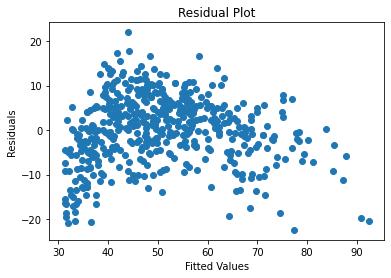

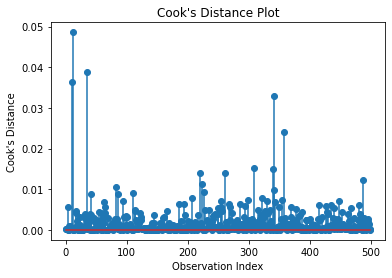

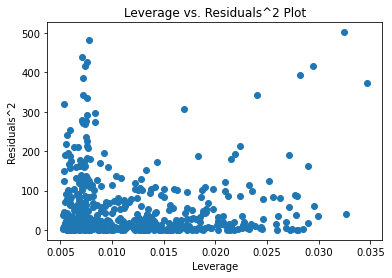

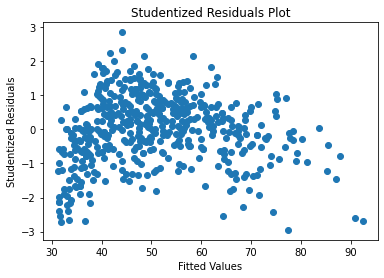

In [232]:
# outliers
# Residual analysis
residuals = results.resid
plt.scatter(results.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Cook's distance
influence = results.get_influence()
cook_distance = influence.cooks_distance[0]
plt.stem(cook_distance)
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.show()

# Leverage vs. Residuals squared
leverage = influence.hat_matrix_diag
plt.scatter(leverage, residuals**2)
plt.xlabel('Leverage')
plt.ylabel('Residuals^2')
plt.title('Leverage vs. Residuals^2 Plot')
plt.show()

# Studentized residuals
studentized_residuals = influence.resid_studentized_internal
plt.scatter(results.fittedvalues, studentized_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Studentized Residuals')
plt.title('Studentized Residuals Plot')
plt.show()


V grafech vidíme, že v datech se nachází nějaké odlehlé hodnoty. Vybereme si například standardizovaná rezidua a identifikujeme body, které model špatně popisuje. Odstraníme všechny body, které mají hodnotu standardizovaného rezidua v absolutní hodnotě větší než 2.

In [202]:
import numpy as np

df = df_backup

# Identify outliers using some criterion (e.g., standardized residuals)
standardized_residuals = results.resid / results.mse_resid**0.5
outlier_indices = np.abs(standardized_residuals) > 3  # Adjust the threshold as needed

# Remove entire rows with outliers
df_no_outliers = df[~outlier_indices].copy()

# Print the length before and after removing outliers
print("Length before removing outliers:", len(df))
print("Length after removing outliers:", len(df_no_outliers))

# Now df_no_outliers contains the DataFrame without rows identified as outliers based on standardized residuals


# # Identify outliers using a quantile of the studentized residuals
# influence = results.get_influence()
# studentized_residuals = influence.resid_studentized_internal
# quantile_threshold = 0.95  # Adjust the quantile as needed

# # Determine the threshold based on the quantile
# threshold = np.quantile(np.abs(studentized_residuals), quantile_threshold)

# # Remove entire rows with outliers
# df_no_outliers = df[np.abs(studentized_residuals) <= threshold].copy()

# # Print the length before and after removing outliers
# print("Length before removing outliers:", len(df))
# print("Length after removing outliers:", len(df_no_outliers))

# Now df_no_outliers contains the DataFrame without rows identified as outliers based on the specified quantile

df_backup = df.copy()
df = df_no_outliers


Length before removing outliers: 502
Length after removing outliers: 500


In [148]:

# # Identify outliers using some criterion (e.g., studentized residuals)
# influence = results.get_influence()
# studentized_residuals = influence.resid_studentized_internal
# outlier_indices = np.abs(studentized_residuals) > 3  # Adjust the threshold as needed

# # Remove entire rows with outliers
# df_no_outliers = df.copy()
# # df_no_outliers['Ping [ms]'] = np.where(outlier_indices, df['Ping [ms]'].mean(), df['Ping [ms]'])
# print(len(df_no_outliers))

# true_indices = df.index[outlier_indices == True]

# for i in true_indices:
#     df_no_outliers = df_no_outliers.drop(i)

# print(len(df_no_outliers))

# df = df_no_outliers

502
500


Z výše uvedeného, výchozího plného kvadratického modelu je vidět, že nejvyšší p-hodnotu má proměnná OSType_iOS. Z modelu ji tedy vypustíme a přepočteme celou regresi znovu.

In [149]:
# drop the OSType_iOS variable
formula_x_y = 'ActiveUsers + InteractingPct + OSType_MacOS + OSType_Windows'
formula_xy = 'ActiveUsers:InteractingPct + ActiveUsers:OSType_MacOS + ActiveUsers:OSType_Windows + ActiveUsers:OSType_iOS + InteractingPct:OSType_MacOS + InteractingPct:OSType_Windows + InteractingPct:OSType_iOS'
formula_x2_y2 = 'I(ActiveUsers**2) + I(InteractingPct**2)'
formula = 'Q("Ping [ms]") ~ ' + formula_x_y + ' + ' + formula_xy + ' + ' + formula_x2_y2

model = smf.ols(formula=formula, data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Q("Ping [ms]")   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     268.0
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          5.30e-212
Time:                        20:37:31   Log-Likelihood:                -1528.3
No. Observations:                 500   AIC:                             3085.
Df Residuals:                     486   BIC:                             3144.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

Z nově přepočteného modelu lze vyčíst, že se zde stále objevují proměnné, které mají p-hodnotu vyšší než 0.05. Proto vypustíme tu proměnnou, která má nejvyšší p-hodnotu - proměnnou InteractingPct*OSType_iOS.

In [150]:
# drop the InteractingPct*OSType_iOS variable
formula_x_y = 'ActiveUsers + InteractingPct + OSType_MacOS + OSType_Windows'
formula_xy = 'ActiveUsers:InteractingPct + ActiveUsers:OSType_MacOS + ActiveUsers:OSType_Windows + ActiveUsers:OSType_iOS + InteractingPct:OSType_MacOS + InteractingPct:OSType_Windows'
formula_x2_y2 = 'I(ActiveUsers**2) + I(InteractingPct**2)'
formula = 'Q("Ping [ms]") ~ ' + formula_x_y + ' + ' + formula_xy + ' + ' + formula_x2_y2

model = smf.ols(formula=formula, data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Q("Ping [ms]")   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     290.9
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          3.05e-213
Time:                        20:37:36   Log-Likelihood:                -1528.3
No. Observations:                 500   AIC:                             3083.
Df Residuals:                     487   BIC:                             3137.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

Z přepočítaného modelu je opět vidět, že se zde stále vyskytují proměnné s p-hodnotami vyššími než 0.05. Nyní tedy odstraníme proměnnou InteractingPct*OSType_iOS.

In [151]:
# drop the InteractingPct*OSType_Windows variable
formula_x_y = 'ActiveUsers + InteractingPct + OSType_MacOS + OSType_Windows'
formula_xy = 'ActiveUsers:InteractingPct + ActiveUsers:OSType_MacOS + ActiveUsers:OSType_Windows + ActiveUsers:OSType_iOS + InteractingPct:OSType_MacOS'
formula_x2_y2 = 'I(ActiveUsers**2) + I(InteractingPct**2)'
formula = 'Q("Ping [ms]") ~ ' + formula_x_y + ' + ' + formula_xy + ' + ' + formula_x2_y2

model = smf.ols(formula=formula, data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Q("Ping [ms]")   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     318.0
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          1.68e-214
Time:                        20:37:38   Log-Likelihood:                -1528.3
No. Observations:                 500   AIC:                             3081.
Df Residuals:                     488   BIC:                             3131.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

Dále vypustíme proměnnou InteractingPct*OSType_MacOS a přepočteme jej.

In [152]:
# drop the InteractingPct*OSType_MacOS variable
formula_x_y = 'ActiveUsers + InteractingPct + OSType_MacOS + OSType_Windows'
formula_xy = 'ActiveUsers:InteractingPct + ActiveUsers:OSType_MacOS + ActiveUsers:OSType_Windows + ActiveUsers:OSType_iOS'
formula_x2_y2 = 'I(ActiveUsers**2) + I(InteractingPct**2)'
formula = 'Q("Ping [ms]") ~ ' + formula_x_y + ' + ' + formula_xy + ' + ' + formula_x2_y2

model = smf.ols(formula=formula, data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Q("Ping [ms]")   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     350.4
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          9.54e-216
Time:                        20:37:41   Log-Likelihood:                -1528.4
No. Observations:                 500   AIC:                             3079.
Df Residuals:                     489   BIC:                             3125.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

Dále z regresního modelu vypustíme proměnnou $Interacting^2$ a přepočítáme jej.

In [153]:
# vyhodime InteractingPct**2
formula_x_y = 'ActiveUsers + InteractingPct + OSType_MacOS + OSType_Windows'
formula_xy = 'ActiveUsers:InteractingPct + ActiveUsers:OSType_MacOS + ActiveUsers:OSType_Windows + ActiveUsers:OSType_iOS'
formula_x2_y2 = 'I(ActiveUsers**2)'
formula = 'Q("Ping [ms]") ~ ' + formula_x_y + ' + ' + formula_xy + ' + ' + formula_x2_y2

model = smf.ols(formula=formula, data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Q("Ping [ms]")   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     389.6
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          6.32e-217
Time:                        20:37:43   Log-Likelihood:                -1528.7
No. Observations:                 500   AIC:                             3077.
Df Residuals:                     490   BIC:                             3120.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

Nyní vidíme, že jediná proměnná, která má p-hodnotu vyšší než 0.05 je proměnná OSType_MacOS. Proto ji z regresního podelu také vypustíme.

In [238]:
# drop the OSType_MacOS variable
formula_x_y = 'ActiveUsers + InteractingPct + OSType_Windows'
formula_xy = 'ActiveUsers:InteractingPct + ActiveUsers:OSType_MacOS + ActiveUsers:OSType_Windows + ActiveUsers:OSType_iOS'
formula_x2_y2 = 'I(ActiveUsers**2)'
formula = 'Q("Ping [ms]") ~ ' + formula_x_y + ' + ' + formula_xy + ' + ' + formula_x2_y2

model = smf.ols(formula=formula, data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Q("Ping [ms]")   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     330.9
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          9.30e-193
Time:                        23:02:00   Log-Likelihood:                -1599.7
No. Observations:                 502   AIC:                             3217.
Df Residuals:                     493   BIC:                             3255.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

Z posledního regresního modelu je vidět, že jediná p-hodnota, která se v něm vyskytuje a je vyšší než hodnota 0.05 je p-hodnota konstanty (Intercept). Tu z modelu zpravidla nevyřazujeme a proto ji i v našem modelu ponecháme. Nalezli jsme tedy výsledný kvadratický model s charakteristikami vypsanými výše.  
Po dosazení bodových odhadů do rovnice získáváme následující rovnici:
$Ping = 0.0099*ActiveUsers + 34.2568*InteractingPct + 7.3575*OSType\_Windows - 0.0031*ActiveUsers*InteractingPct + 0.0017*ActiveUsers*OSType\_MacOS - 0.0017*ActiveUsers*OSType\_Windows - 0.0011*ActiveUsers*OSType\_iOS - 4.146e-07*ActiveUsers^2 + \epsilon$


## UKOLY k 2a
- Zapište rovnici Vašeho finálního modelu.
- Diskutujte splnění předpokladů lineární regrese a základní regresní diagnostiky.
- Pokud (až během regresního modelování) identifikujete některé „extrémně odlehlé hodnoty“ můžete ty „nejodlehlejší“ hodnoty, po alespoň krátkém zdůvodnění, vyřadit.

DC: Základní předpoklady lineární regrese a regresní diagnostiky" popisujete jen tu multikolinearitu, homoskedasticitu, normalni rozdeleni rezidui, nezavislost rezidui,  linearni vztah mezi nezavislymi a zavislou promennou a odlehle hodnoty nebo jeste neco jinyho?

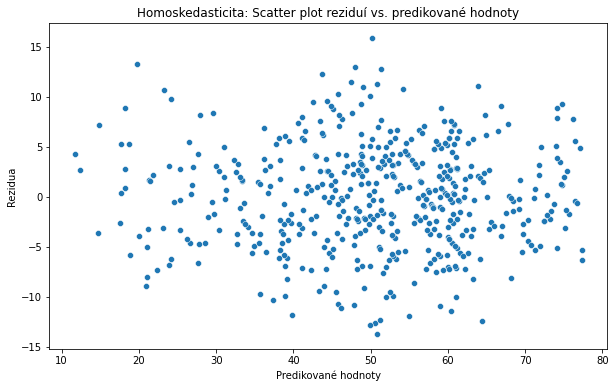

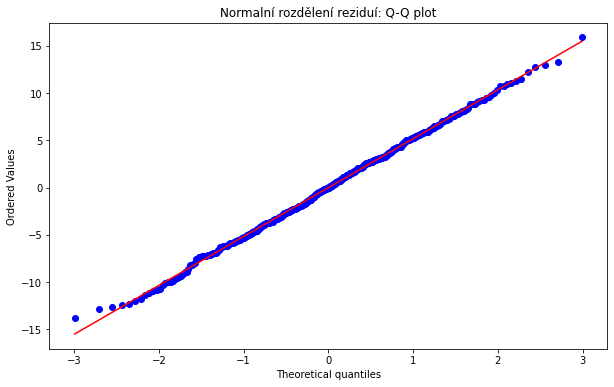

demo


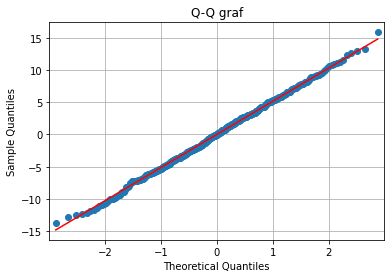

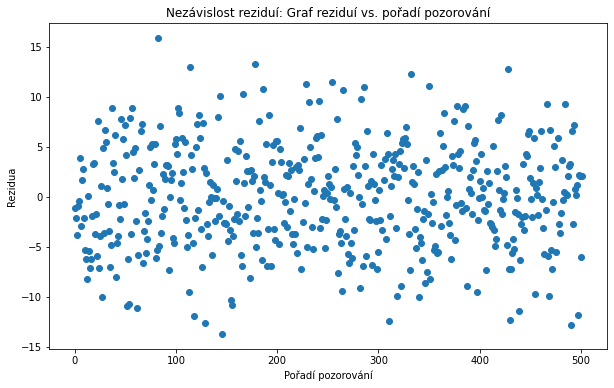

demo


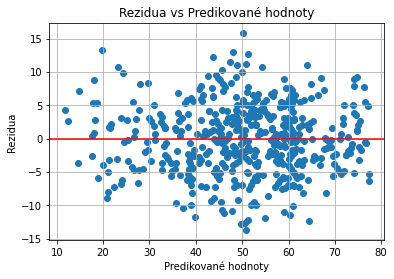

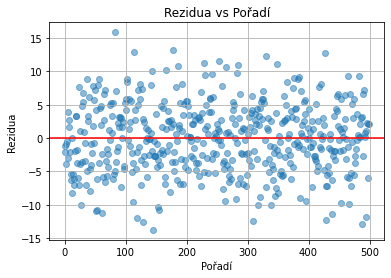

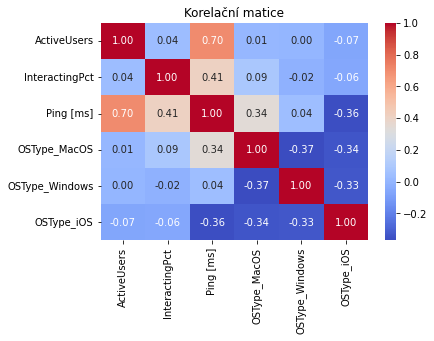

In [209]:
# Předpokládám, že máte již vytvořený model 'results'

# Diagnostika reziduí
residuals = results.resid

# 1. Homoskedasticita
plt.figure(figsize=(10, 6))
sns.scatterplot(x=results.fittedvalues, y=residuals)
plt.title('Homoskedasticita: Scatter plot reziduí vs. predikované hodnoty')
plt.xlabel('Predikované hodnoty')
plt.ylabel('Rezidua')
plt.show()

# 2. Normální rozdělení reziduí
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt, fit=True)
plt.title('Normalní rozdělení reziduí: Q-Q plot')
plt.show()

print("demo")
qqplot(results.resid, line='s')
plt.title('Q-Q graf')
plt.grid(True)
plt.show()

# 3. Nezávislost reziduí
plt.figure(figsize=(10, 6))
plt.scatter(df.index, residuals, marker='o')
plt.title('Nezávislost reziduí: Graf reziduí vs. pořadí pozorování')
plt.xlabel('Pořadí pozorování')
plt.ylabel('Rezidua')
plt.show()

print("demo")
#res vs fit
plt.scatter(results.fittedvalues, results.resid)
plt.axhline(y=0, color='r', linestyle='-') 
plt.grid(True)
plt.xlabel('Predikované hodnoty')
plt.ylabel('Rezidua')
plt.title('Rezidua vs Predikované hodnoty')
plt.show()

# res vs order
plt.scatter(range(len(results.resid)), results.resid, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-') 
plt.grid(True)
plt.title("Rezidua vs Pořadí")
plt.xlabel("Pořadí")
plt.ylabel("Rezidua")
plt.show()



# 4. Testování multikolinearity
# Kontrola korelační matice
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelační matice')
plt.show()

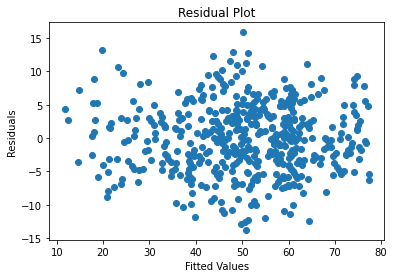

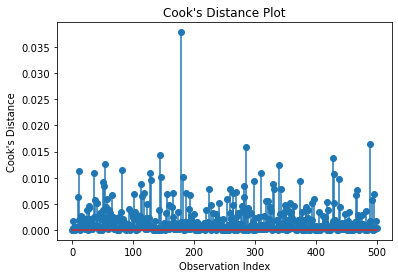

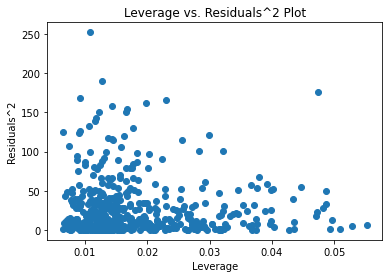

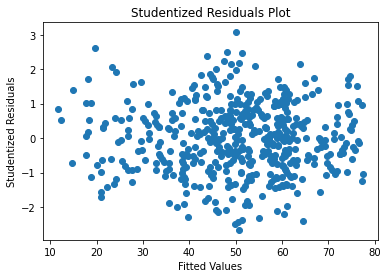

In [205]:
# outliers
# Residual analysis
residuals = results.resid
plt.scatter(results.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Cook's distance
influence = results.get_influence()
cook_distance = influence.cooks_distance[0]
plt.stem(cook_distance)
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.show()

# Leverage vs. Residuals squared
leverage = influence.hat_matrix_diag
plt.scatter(leverage, residuals**2)
plt.xlabel('Leverage')
plt.ylabel('Residuals^2')
plt.title('Leverage vs. Residuals^2 Plot')
plt.show()

# Studentized residuals
studentized_residuals = influence.resid_studentized_internal
plt.scatter(results.fittedvalues, studentized_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Studentized Residuals')
plt.title('Studentized Residuals Plot')
plt.show()


The characteristics you've provided are related to diagnostics and statistics from the summary output of a regression model. Let's go through each of them:

1. **Omnibus:**
   - **Interpretation:** Omnibus is a statistical test for the overall significance of the model. It tests the null hypothesis that the residuals are normally distributed.
   - **Value (0.662):** A p-value greater than 0.05 (common significance level) indicates that there is no significant departure from normality. In this case (p-value = 0.718), we fail to reject the null hypothesis, suggesting that the residuals are approximately normally distributed.

2. **Durbin-Watson:**
   - **Interpretation:** The Durbin-Watson statistic tests for the presence of autocorrelation among the residuals.
   - **Value (1.990):** The Durbin-Watson statistic ranges from 0 to 4. A value close to 2 suggests no significant autocorrelation. In this case, a value of 1.990 indicates a lack of substantial autocorrelation.

3. **Prob(Omnibus):**
   - **Interpretation:** Similar to Omnibus, this is the probability associated with the Omnibus test.
   - **Value (0.718):** As mentioned earlier, a higher p-value (greater than 0.05) suggests that the residuals are normally distributed.

4. **Jarque-Bera (JB):**
   - **Interpretation:** The Jarque-Bera test is another test for normality of residuals, and it is based on skewness and kurtosis.
   - **Value (0.752):** The p-value associated with the JB test. A higher p-value (0.752) suggests that we do not reject the null hypothesis of normality.

5. **Skew:**
   - **Interpretation:** Skewness measures the asymmetry of the residuals' distribution. A value near 0 indicates a symmetric distribution.
   - **Value (0.014):** A skewness close to 0 suggests that the residuals are approximately symmetric.

6. **Prob(JB):**
   - **Interpretation:** The probability associated with the Jarque-Bera test.
   - **Value (0.687):** Similar to the JB p-value, it suggests that we do not reject the null hypothesis of normality.

7. **Kurtosis:**
   - **Interpretation:** Kurtosis measures the tail heaviness of the distribution of residuals. A value of 3 is often used as a baseline for normality.
   - **Value (2.812):** A kurtosis less than 3 indicates lighter tails than a normal distribution.

8. **Cond. No.:**
   - **Interpretation:** Condition Number is a measure of multicollinearity in the model. A large condition number suggests potential multicollinearity.
   - **Value (4.26e+08):** A very high condition number may indicate multicollinearity issues. It's essential to check the variance inflation factor (VIF) for individual predictors to assess multicollinearity.

In summary, the provided statistics suggest that the residuals in your model appear to be normally distributed, without substantial autocorrelation, and with low skewness and kurtosis. The condition number raises concerns about potential multicollinearity, and further investigation into individual predictors' VIF values would be advisable.

2) Pomocí Vašeho výsledného modelu identifikujte, pro které nastavení parametrů má
odezva nejproblematičtější hodnotu.

TODO:
Výsledný model bude mít nejproblematičtější hodnotu pro maximální/minimální hodnotu Ping.

In [206]:
# Identify the row with the maximum and minimum values of the dependent variable
max_ping_row = df.loc[df['Ping [ms]'].idxmax()]
min_ping_row = df.loc[df['Ping [ms]'].idxmin()]

# Display the parameter settings for maximum and minimum values
print("Parameter settings for maximum Ping [ms]:")
print(max_ping_row)

print("\nParameter settings for minimum Ping [ms]:")
print(min_ping_row)


Parameter settings for maximum Ping [ms]:
ActiveUsers       9516.0000
InteractingPct       0.6716
Ping [ms]           84.0000
OSType_MacOS         1.0000
OSType_Windows       0.0000
OSType_iOS           0.0000
Name: 259, dtype: float64

Parameter settings for minimum Ping [ms]:
ActiveUsers       1036.0000
InteractingPct       0.2179
Ping [ms]           11.0000
OSType_MacOS         0.0000
OSType_Windows       0.0000
OSType_iOS           1.0000
Name: 85, dtype: float64


3) Odhadněte hodnotu odezvy uživatele s Windows, při průměrném nastavení ostatních
parametrů a vypočtěte konfidenční interval a predikční interval pro toto nastavení.

In [207]:
# average settings
average_settings = {
    'ActiveUsers': df['ActiveUsers'].mean(),
    'InteractingPct': df['InteractingPct'].mean(),
    'OSType_MacOS': 0,
    'OSType_iOS': 0,
    'OSType_Windows': 1
}

# get the prediction for the average_settings
prediction = results.get_prediction(average_settings)

# get the mean response from prediction
mean_response = prediction.predicted_mean
print(f"Mean response for a user with Windows at average settings: {mean_response[0]:.4f}")

# find out the prediction and confidence intervals
pred = prediction.summary_frame(alpha=0.05)
# confidence interval - mean_ci
print("\nConfidence Interval:")
print("[", pred['mean_ci_lower'][0], ", ", pred['mean_ci_upper'][0], "]")

# prediction interval - obs_ci
print("\nPrediction Interval:")
print("[", pred['obs_ci_lower'][0], ", ", pred['obs_ci_upper'][0], "]")





Mean response for a user with Windows at average settings: 54.9992

Confidence Interval:
[ 53.972097898080136 ,  56.02628895711517 ]

Prediction Interval:
[ 44.73996651908557 ,  65.25842033610974 ]


4) Na základě jakýchkoli vypočtených charakteristik argumentujte, zdali je Váš model
„vhodný“ pro další použití.

TODO